In [1]:
from utils import *
from plot_graphe import *

In [2]:
import joblib

In [3]:
import xgboost as xgb

In [4]:
test = pd.read_csv('data_after_fe2/20202021_clean.csv')
test_R = test[test['gameType'] == 'R']
test_P = test[test['gameType'] == 'P']

In [4]:
test_P.columns

Index(['gamePk', 'season', 'gameType', 'home', 'away', 'eventTypeId',
       'eventType', 'shotType', 'shooter', 'shooterTeam', 'distance', 'angle',
       'goalie', 'eventPeriod', 'eventPeriodType', 'x', 'y', 'emptyNet',
       'isGoal', 'game_time', 'eventID', 'prevEventID', 'timeFromLastEvent',
       'prevEventX', 'prevEventY', 'prevEventType', 'distFromPrev',
       'isRebound', 'changeInAngle', 'speed'],
      dtype='object')

In [5]:
test_R.columns

Index(['gamePk', 'season', 'gameType', 'home', 'away', 'eventTypeId',
       'eventType', 'shotType', 'shooter', 'shooterTeam', 'distance', 'angle',
       'goalie', 'eventPeriod', 'eventPeriodType', 'x', 'y', 'emptyNet',
       'isGoal', 'game_time', 'eventID', 'prevEventID', 'timeFromLastEvent',
       'prevEventX', 'prevEventY', 'prevEventType', 'distFromPrev',
       'isRebound', 'changeInAngle', 'speed'],
      dtype='object')

In [6]:
test_R_oneHot = pre_processing(test_R ,oneHot=True)
test_P_oneHot = pre_processing(test_P ,oneHot=True)

In [7]:
X_p,y_p = get_X_y(test_P_oneHot)

In [8]:
X_r,y_r = get_X_y(test_R_oneHot)

In [9]:
X_r

,distance,angle,emptyNet,eventPeriod,x,y,game_time,timeFromLastEvent,distFromPrev,prevEventX,...,prevEventType_GOAL,prevEventType_HIT,prevEventType_MISSED_SHOT,prevEventType_PENALTY,prevEventType_PERIOD_END,prevEventType_PERIOD_READY,prevEventType_PERIOD_START,prevEventType_SHOT,prevEventType_STOP,prevEventType_TAKEAWAY
0,35.355339,45.000000,0,1,-75.0,-25.0,179,26,36.345564,-39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,46.389654,7.431408,0,1,-54.0,-6.0,405,8,14.317821,-60.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22.360680,10.304846,0,1,78.0,4.0,436,22,131.003817,-53.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19.416488,11.888658,0,1,-81.0,4.0,464,28,151.076140,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22.203603,7.765166,0,1,-78.0,3.0,480,16,3.162278,-81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52319,20.615528,50.906141,0,3,87.0,16.0,2888,12,184.010869,-97.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52320,43.266615,33.690068,0,3,64.0,24.0,3006,8,48.020829,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52321,50.990195,25.559965,0,3,54.0,22.0,3017,11,10.198039,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
52322,53.338541,30.411081,0,3,-54.0,27.0,3105,11,149.000000,95.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# XGBoost

In [10]:
features_selected = ['y',
 'speed',
 'shotType_Snap Shot',
 'isRebound',
 'shotType_Wrap-around',
 'game_time',
 'shotType_Wrist Shot',
 'eventPeriod',
 'timeFromLastEvent',
 'shotType_Slap Shot',
 'shotType_Backhand',
 'prevEventType_HIT',
 'angle',
 'prevEventType_STOP',
 'distance',
 ]

In [11]:
data_train = pd.read_csv('X_train_oneHot.csv')
X,y = get_X_y(data_train)

In [12]:
X_train,y_train = get_X_y(data_train)
X_train['speed'] = replace_inf(data_train)

In [13]:
X_train_xgb = X_train[features_selected]

In [14]:
xgb_best = xgb.XGBClassifier(learning_rate = 0.1, max_depth=5, n_estimators=200, scale_pos_weight = 5,\
                             random_state = 42)

In [15]:
xgb_best.fit(X_train_xgb,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [16]:
X_r_xgb = X_r[features_selected]

In [17]:
X_p_xgb = X_p[features_selected]

### XGBoost for play off games

In [18]:
p_pred_xgb = xgb_best.predict(X_p_xgb)

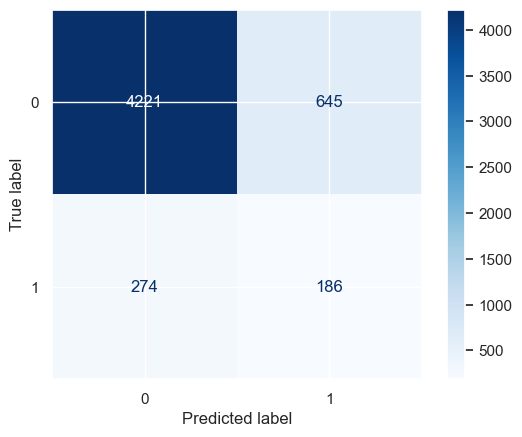

In [19]:
plot_cmap(y_p,p_pred_xgb)

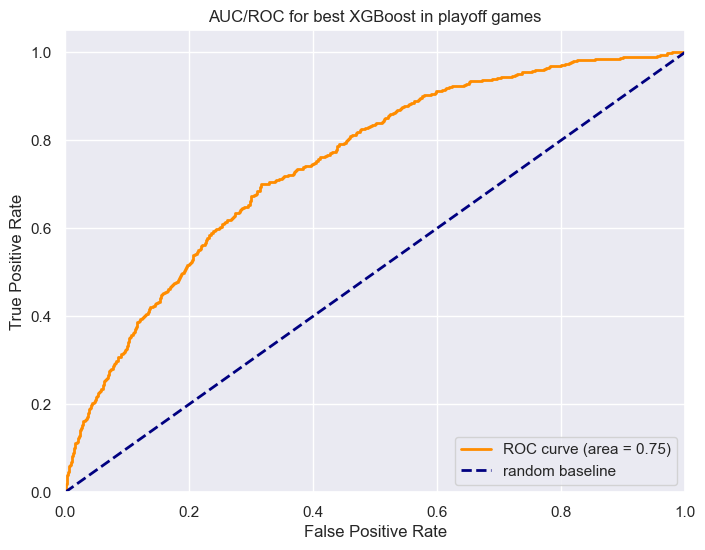

In [26]:
plot_roc_curve(xgb_best,X_p_xgb,y_p,title = 'AUC/ROC for best XGBoost in playoff games')

C:\Users\1\Desktop\milestone2\plot_graphe.py:110: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


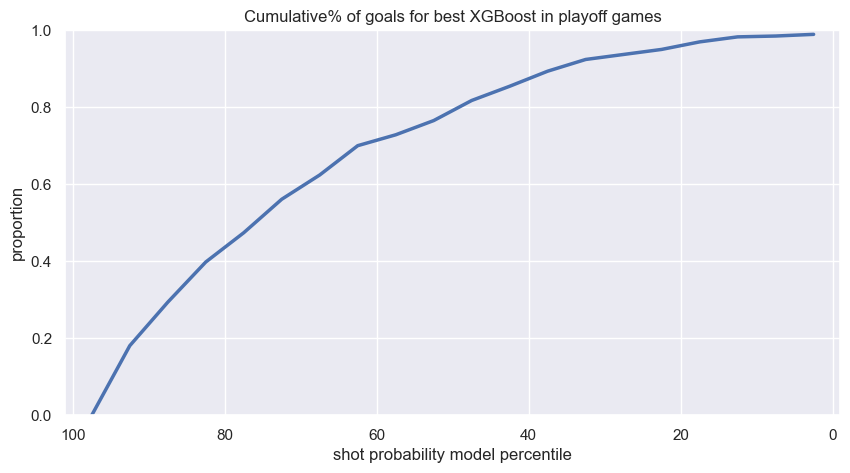

In [27]:
plot_cumu_goal(xgb_best,X_p_xgb,y_p,title = 'Cumulative% of goals for best XGBoost in playoff games')

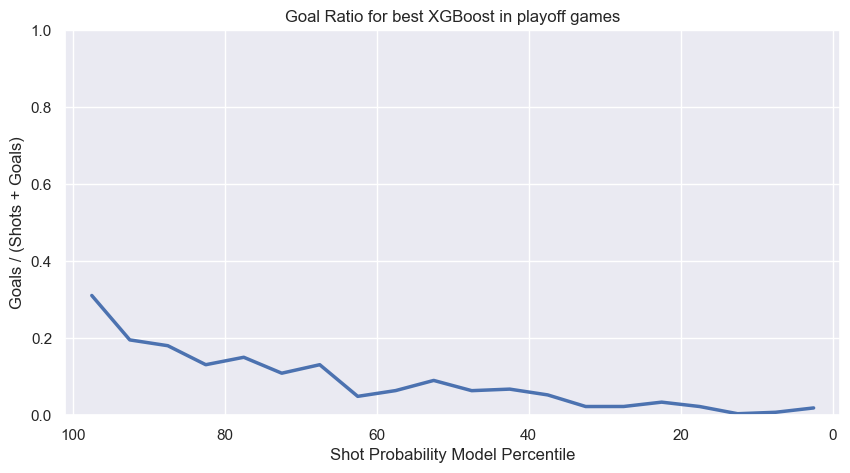

In [28]:
plot_goal_ratio(xgb_best,X_p_xgb,y_p,title = 'Goal Ratio for best XGBoost in playoff games')

C:\Users\1\Desktop\milestone2\plot_graphe.py:138: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


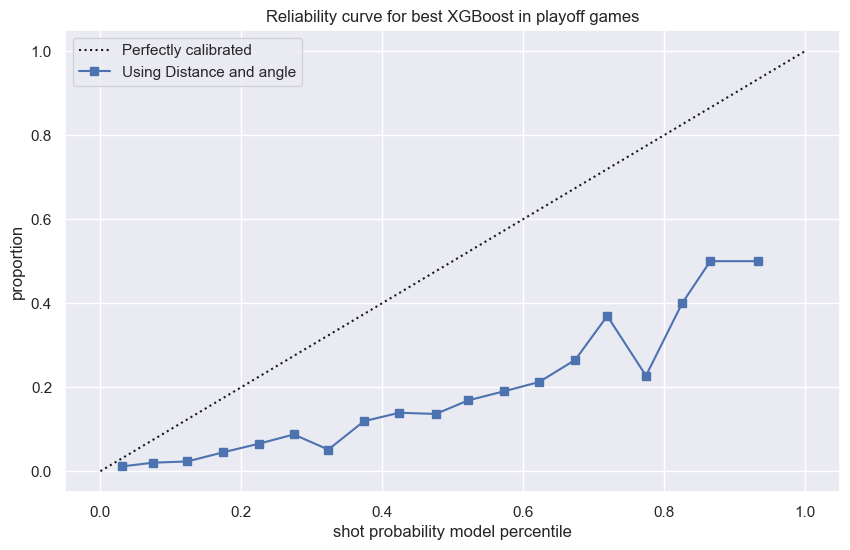

In [29]:
plot_calib(xgb_best,X_p_xgb,y_p,title = 'Reliability curve for best XGBoost in playoff games')

### XGBoost for regular games

In [24]:
r_pred_xgb = xgb_best.predict(X_r_xgb)

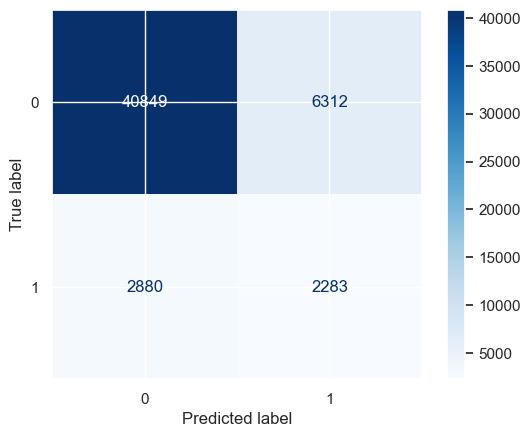

In [25]:
plot_cmap(y_r,r_pred_xgb)

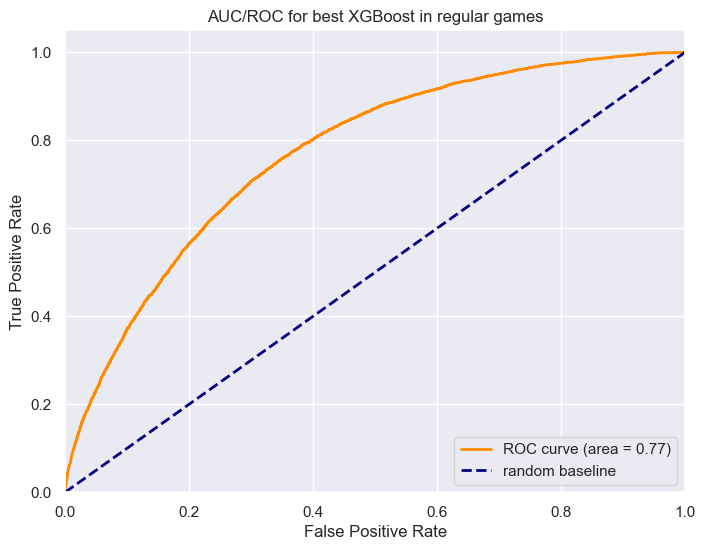

In [30]:
plot_roc_curve(xgb_best,X_r_xgb,y_r,title = 'AUC/ROC for best XGBoost in regular games')

C:\Users\1\Desktop\milestone2\plot_graphe.py:110: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


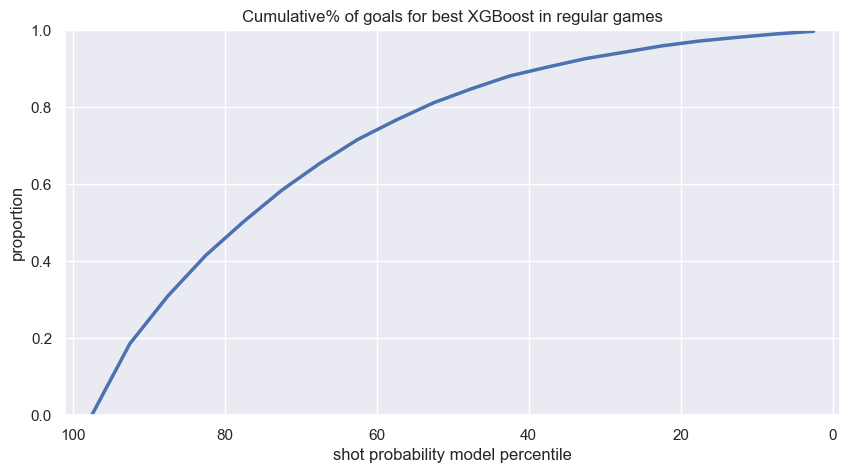

In [32]:
plot_cumu_goal(xgb_best,X_r_xgb,y_r,title = 'Cumulative% of goals for best XGBoost in regular games')

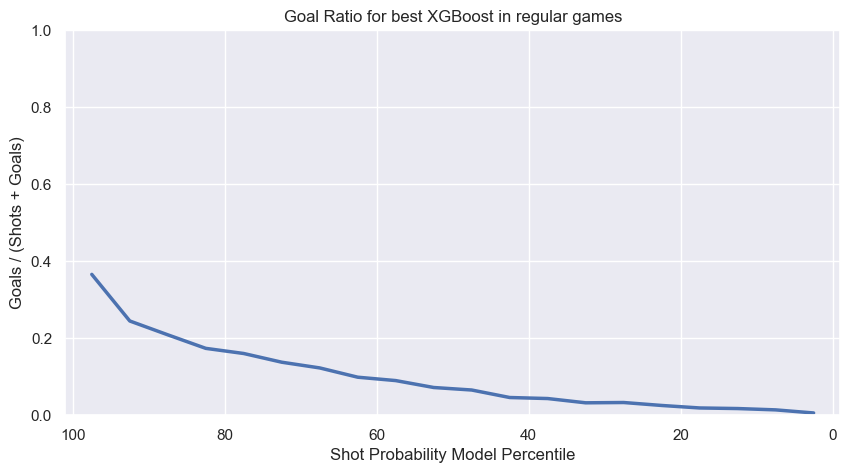

In [33]:
plot_goal_ratio(xgb_best,X_r_xgb,y_r,title = 'Goal Ratio for best XGBoost in regular games')

C:\Users\1\Desktop\milestone2\plot_graphe.py:138: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


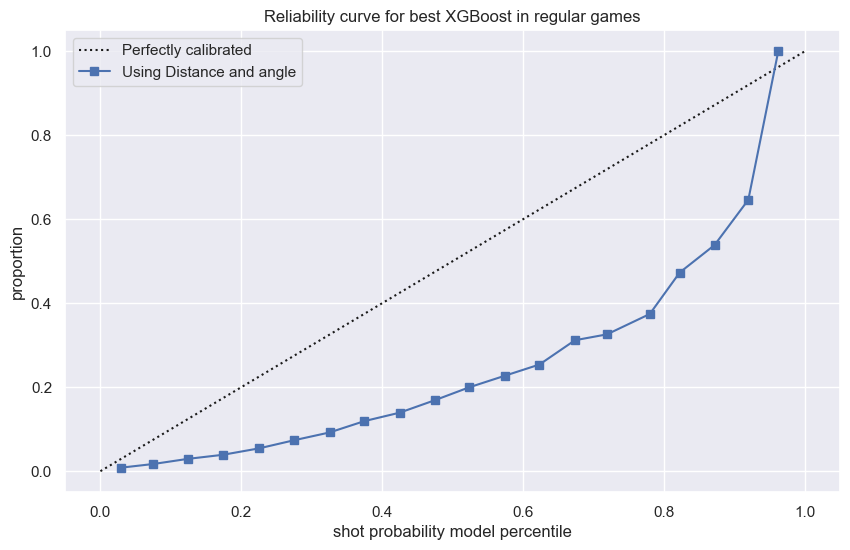

In [34]:
plot_calib(xgb_best,X_r_xgb,y_r,title = 'Reliability curve for best XGBoost in regular games')

# RandomForest

In [5]:
randomForest = joblib.load('../../src/models/RandomForest_1.pkl')

In [6]:
def replace_inf_RF(df, feature):
    max = np.sort(df[feature].unique())[-3]
    return df[feature].replace(np.inf,max)

### Random Forest for play off games

In [7]:
df_playoffs = pre_processing(test_P,oneHot = False)

In [8]:
cleaned_df_playoffs = df_playoffs[(~df_playoffs.distance.isna()) & (~df_playoffs.speed.isna())]
cleaned_df_playoffs = cleaned_df_playoffs[cleaned_df_playoffs['distance']!='shoot out']

In [9]:
X_test_playoffs = cleaned_df_playoffs[['distance', 'angle', 'game_time', 'speed']]
new_speed_test_playoffs = replace_inf_RF(X_test_playoffs, "speed")
X_test_playoffs.speed = new_speed_test_playoffs 
y_test_playoffs = cleaned_df_playoffs['isGoal']

/var/folders/l6/bdpfj8c928vfm_9q6gky77c40000gn/T/ipykernel_4924/954593768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_playoffs.speed = new_speed_test_playoffs


In [10]:
y_hat_playoffs = randomForest.predict(X_test_playoffs)

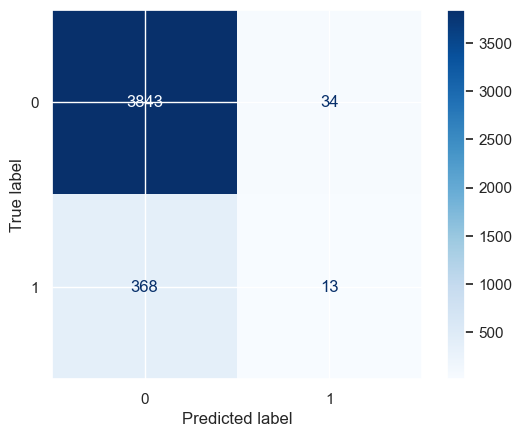

In [11]:
plot_cmap(y_test_playoffs,y_hat_playoffs)

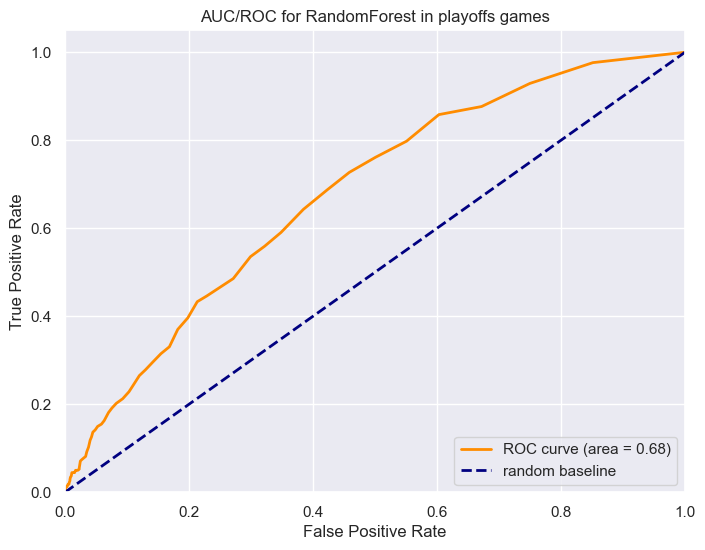

In [12]:
plot_roc_curve(randomForest,X_test_playoffs,y_test_playoffs,title = 'AUC/ROC for RandomForest in playoffs games')

/Users/xiongyuyang/Documents/_Master/IFT6758/NHL-DataScience-IFT-6758-milestone2/notebooks/experiments/plot_graphe.py:110: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


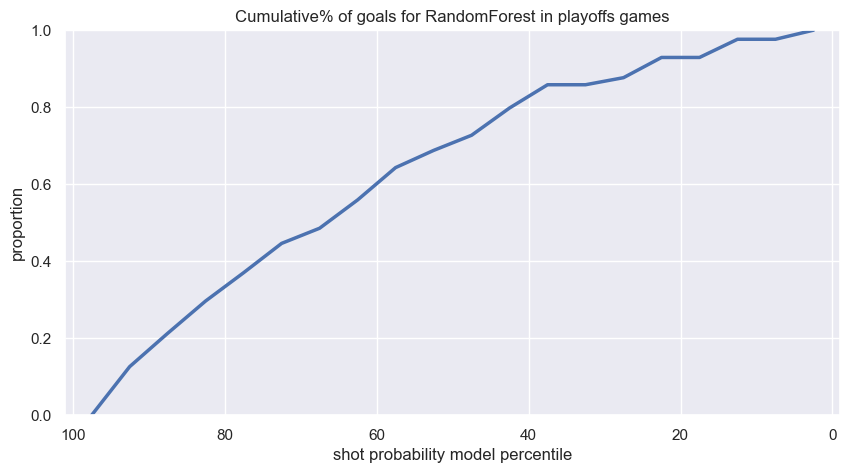

In [13]:
plot_cumu_goal(randomForest,X_test_playoffs,y_test_playoffs,title = 'Cumulative% of goals for RandomForest in playoffs games')

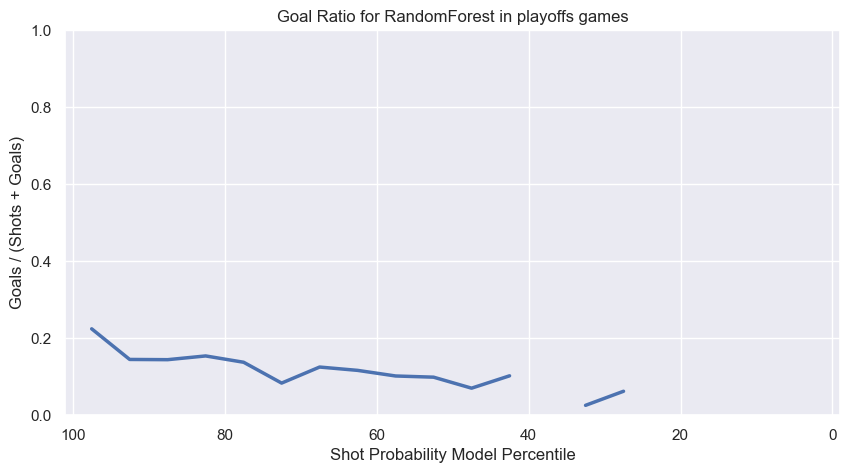

In [14]:
plot_goal_ratio(randomForest,X_test_playoffs,y_test_playoffs,title = 'Goal Ratio for RandomForest in playoffs games')

/Users/xiongyuyang/Documents/_Master/IFT6758/NHL-DataScience-IFT-6758-milestone2/notebooks/experiments/plot_graphe.py:138: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


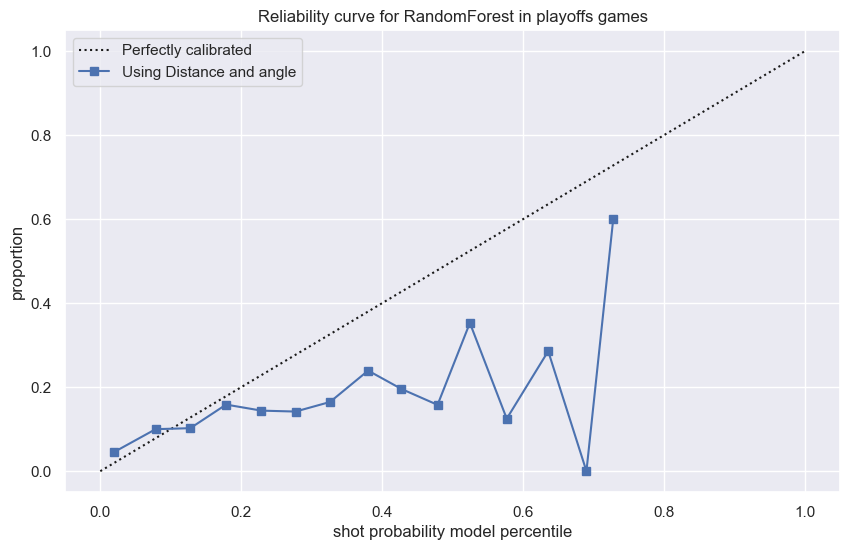

In [15]:
plot_calib(randomForest,X_test_playoffs,y_test_playoffs,title = 'Reliability curve for RandomForest in playoffs games')

### Random Forest for regular games

In [16]:
df_regular = pre_processing(test_R,oneHot = False)

In [17]:
cleaned_df_regular = df_regular[(~df_regular.distance.isna()) & (~df_regular.speed.isna())]
cleaned_df_regular = cleaned_df_regular[cleaned_df_regular['distance']!='shoot out']

In [18]:
X_test_regular = cleaned_df_regular[['distance', 'angle', 'game_time', 'speed']]
new_speed_test_regular = replace_inf_RF(X_test_regular, "speed")
X_test_regular.speed = new_speed_test_regular 
y_test_regular = cleaned_df_regular['isGoal']

/var/folders/l6/bdpfj8c928vfm_9q6gky77c40000gn/T/ipykernel_4924/1409441707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_regular.speed = new_speed_test_regular


In [19]:
y_hat_regular = randomForest.predict(X_test_regular)

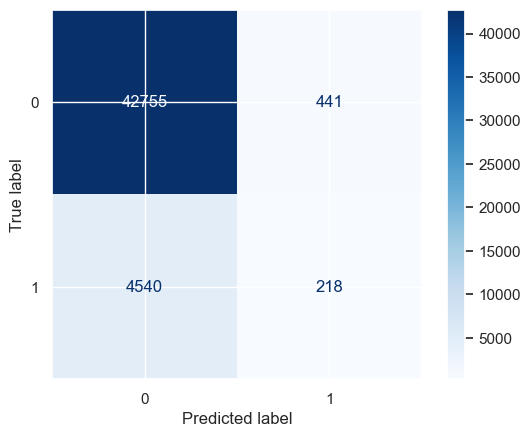

In [20]:
plot_cmap(y_test_regular,y_hat_regular)

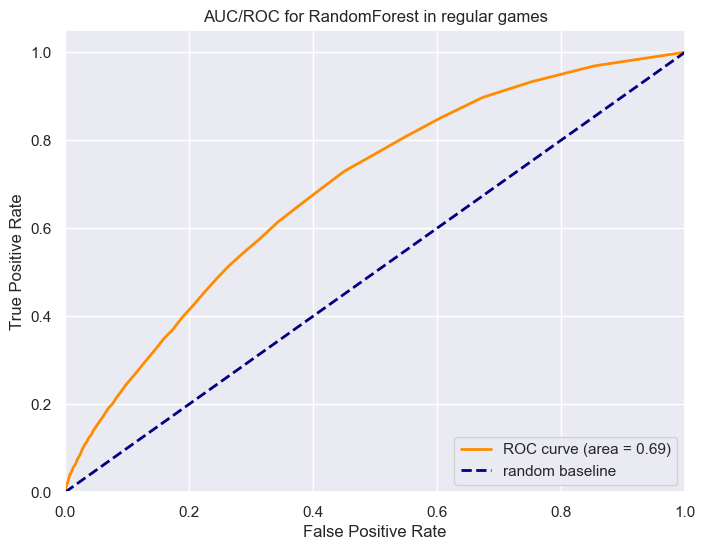

In [21]:
plot_roc_curve(randomForest,X_test_regular,y_test_regular,title = 'AUC/ROC for RandomForest in regular games')

/Users/xiongyuyang/Documents/_Master/IFT6758/NHL-DataScience-IFT-6758-milestone2/notebooks/experiments/plot_graphe.py:110: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


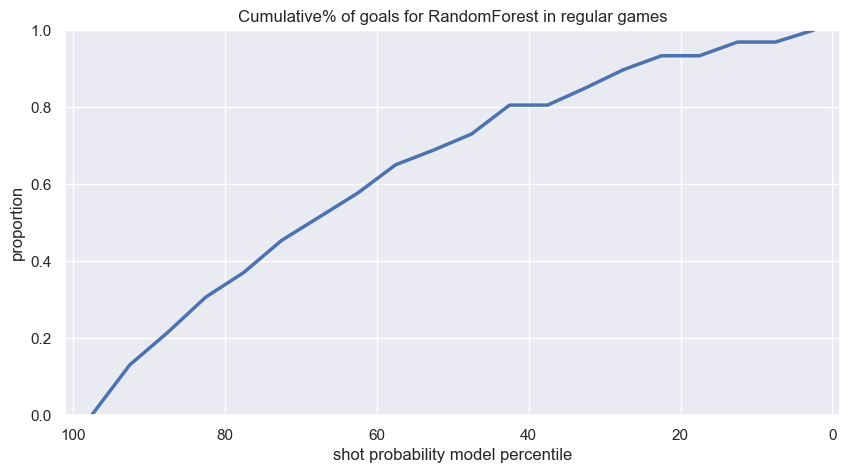

In [22]:
plot_cumu_goal(randomForest,X_test_regular,y_test_regular,title = 'Cumulative% of goals for RandomForest in regular games')

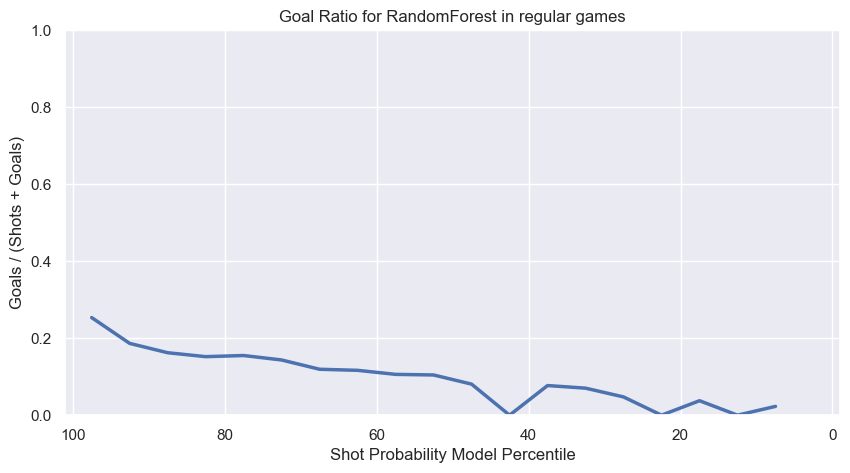

In [23]:
plot_goal_ratio(randomForest,X_test_regular,y_test_regular,title = 'Goal Ratio for RandomForest in regular games')

/Users/xiongyuyang/Documents/_Master/IFT6758/NHL-DataScience-IFT-6758-milestone2/notebooks/experiments/plot_graphe.py:138: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


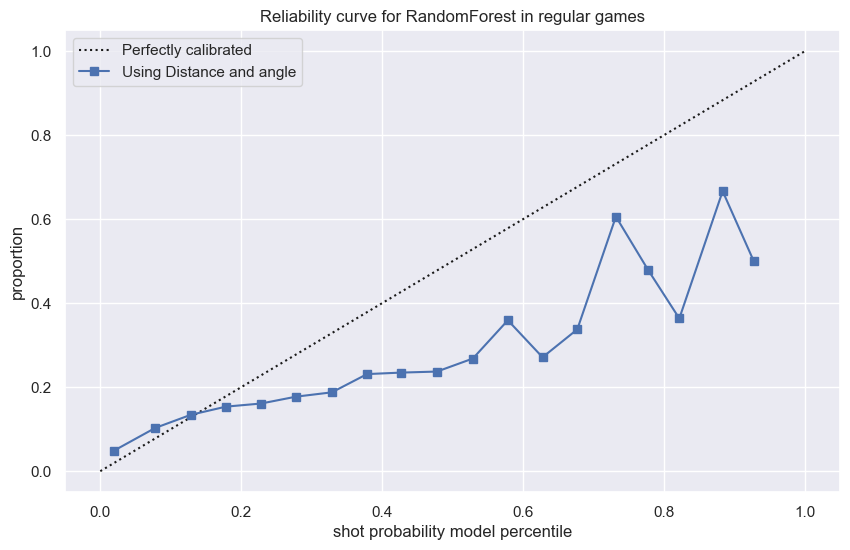

In [24]:
plot_calib(randomForest,X_test_regular,y_test_regular,title = 'Reliability curve for RandomForest in regular games')